# <center> Week 5 (Logistic Regression) </center>
---

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Style the plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [52]:
titanic_data = pd.read_csv('titanic.csv')
#Always show head after reading data
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

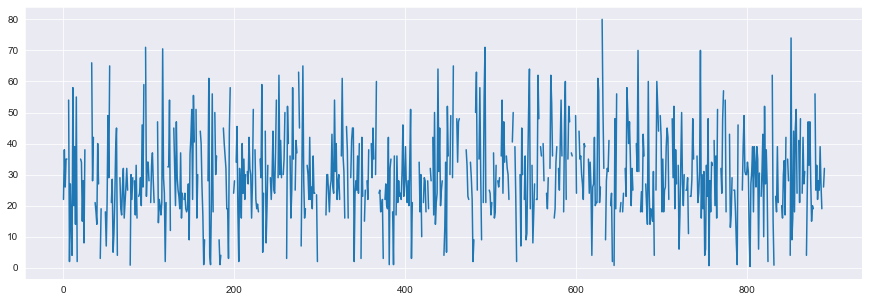

In [53]:
plt.plot(titanic_data["Age"])

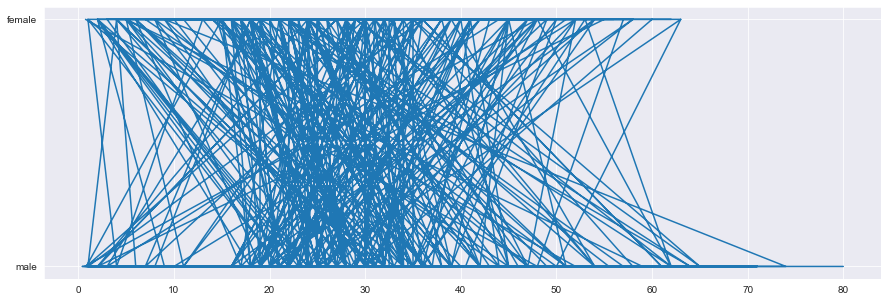

In [54]:
plt.plot(titanic_data["Age"], titanic_data["Sex"])

In [55]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [56]:
titanic_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


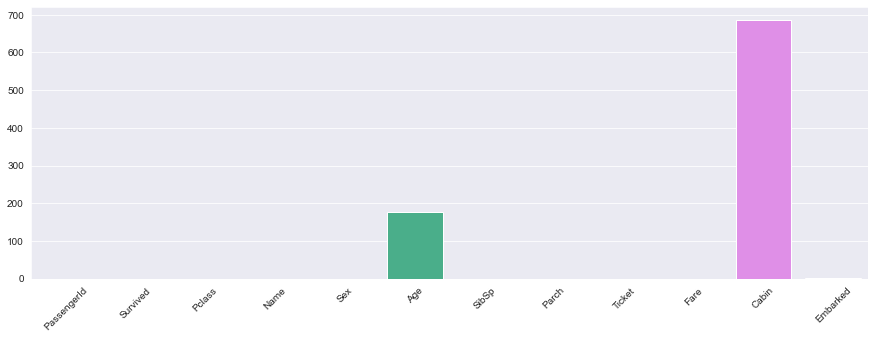

In [58]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()
#This graph makes it hard to see but there is also a couple of nulls in Embarked

In [59]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

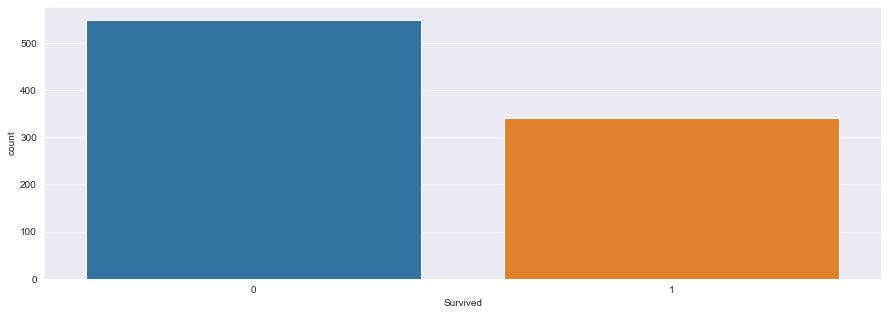

In [60]:
sns.countplot(x=titanic_data['Survived'])
plt.show()

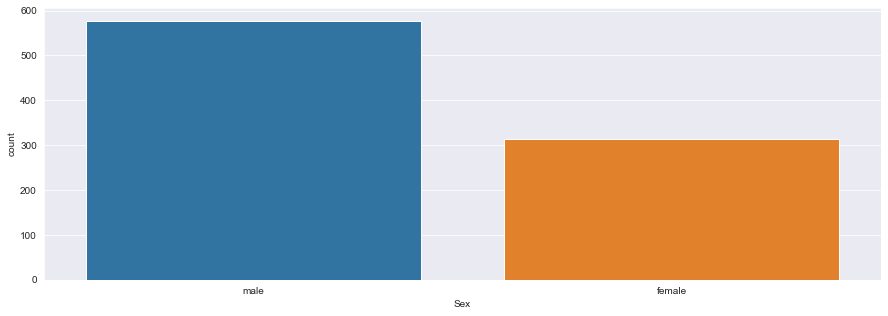

In [61]:
sns.countplot(x=titanic_data['Sex'])
plt.show()

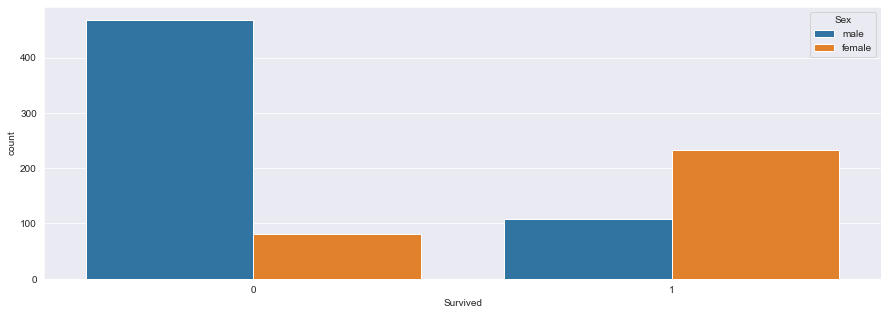

In [62]:
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

In [63]:
titanic_data["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

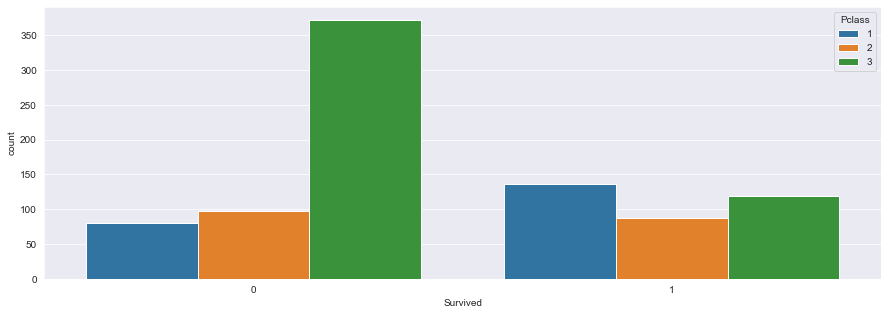

In [64]:
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()

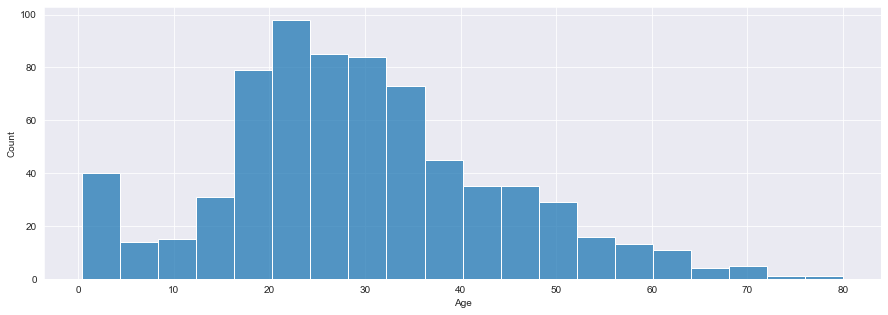

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [65]:
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

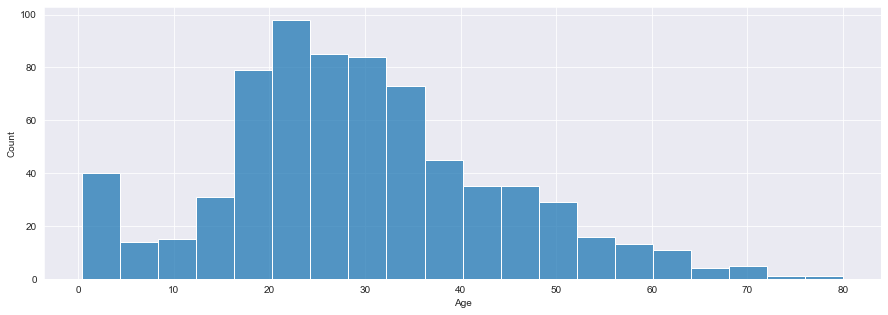

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [66]:
sns.histplot(x=titanic_data['Age'])
#Even without dropping nulls sns.histplot only plots non null values
plt.show()
titanic_data['Age'].describe()

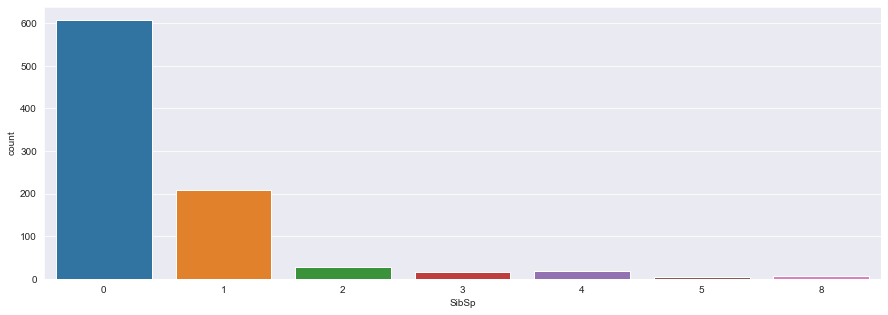

In [67]:
sns.countplot(x=titanic_data['SibSp'])
plt.show()

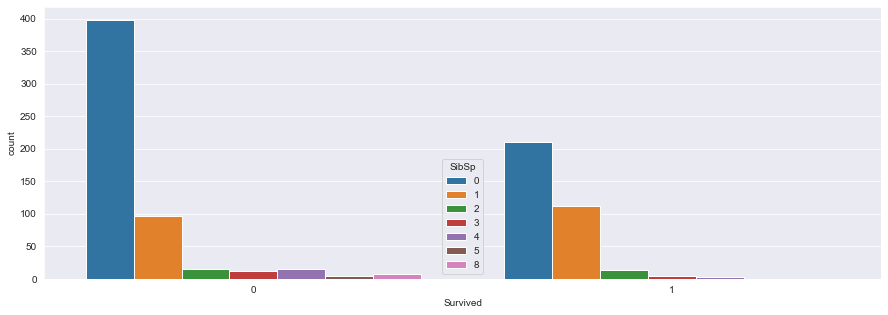

In [68]:
sns.countplot(x=titanic_data['Survived'], hue='SibSp', data=titanic_data)
plt.show()

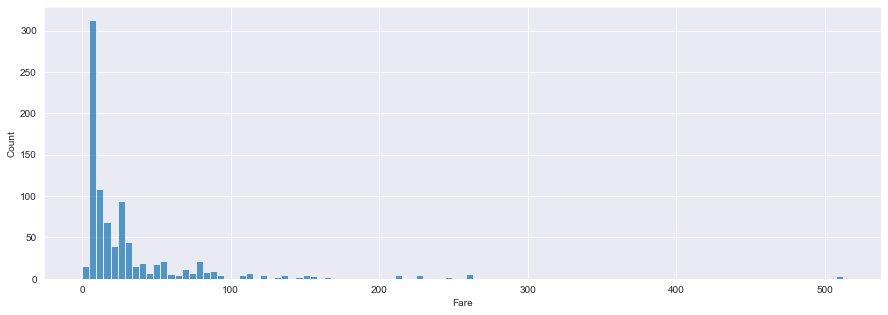

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [69]:
sns.histplot(x=titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

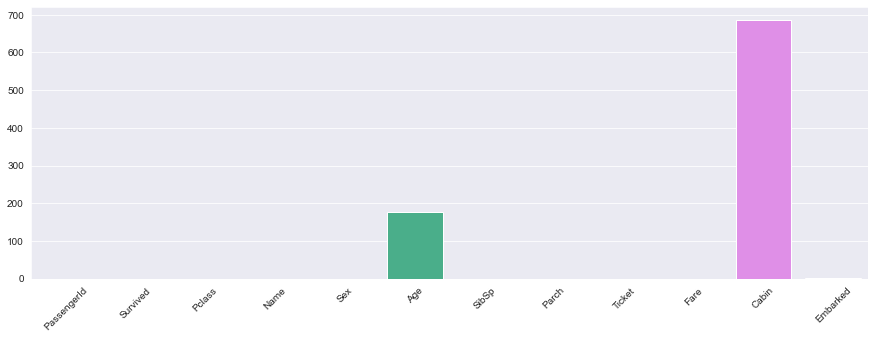

In [70]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [71]:
#This uses a Lambda function to assign the mean age to any null values 
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

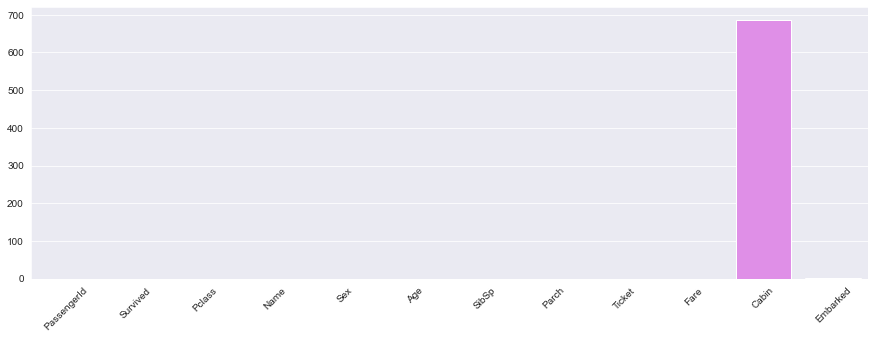

In [72]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()
#This has resolved all of the null values in the age column

In [73]:
#Because there is so much missing data in the cabin column it is better to just drop it entirely instead of trying to 
    #impute it
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)
#Make sure to specify inplace=true so the data is saved between cells

In [75]:
titanic_data.info()
#All items are now non null. Important part of preprocessing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Handling categorical variables
---

In [76]:
'''This turns categorical variables sex and embarked into binary values by adding a new column for each option
    withing one column. eg sex becomes sex_female and sex_male with a 0 or 1 in each column'''

#Drop_first=True gets rid of the categorical column that is being replaced with the dummy variable
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
titanic_data.drop(labels=['Name','Ticket'], axis=1, inplace=True)

In [77]:
titanic_data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [79]:
titanic_data.info()
#Everything is now a number

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_male     889 non-null    uint8  
 8   Embarked_Q   889 non-null    uint8  
 9   Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [80]:
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

'''This uses a function from sklearn to split the data into a training and testing set for the model. Generally
        0.3 to test and 0.7 to train is a good ratio'''

'This uses a function from sklearn to split the data into a training and testing set for the model. Generally\n        0.3 to test and 0.7 to train is a good ratio'

In [81]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

'''This is actually training our model using the training tuple over 1000 iterations'''

'This is actually training our model using the training tuple over 1000 iterations'

In [82]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       174
           1       0.66      0.72      0.69        93

    accuracy                           0.78       267
   macro avg       0.75      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

[[140  34]
 [ 26  67]]


In [84]:
titanic_data.drop(labels=['Embarked_Q'], axis=1, inplace=True)
titanic_data.drop(labels=['Embarked_S'], axis=1, inplace=True)

In [85]:
titanic_data.drop(labels=['PassengerId'], axis=1, inplace=True)

In [86]:
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [88]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       170
           1       0.71      0.69      0.70        97

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

[[143  27]
 [ 30  67]]


After dropping the columns passengerid, embarked_s and embarked_q the mean of the model is essentially the same which
    signals that those columns did not influence the likelihood of survival for a passenger

In [89]:
X = titanic_data[['Pclass', 'Age','Sex_male']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       163
           1       0.73      0.68      0.71       104

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

[[137  26]
 [ 33  71]]


In [90]:
X = titanic_data[['Pclass','Sex_male']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       167
           1       0.75      0.78      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

[[141  26]
 [ 22  78]]


Dropping age and only training the model based off of class and sex actually resulted in a higher average which 
    could suggest that age did not play a factor in survival rate of passengers